<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Spring_2022_Module_3_A_OES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>> Under Construction 

Module 3: Data Science, Regression, and Correlation

Featured outcome: 

> Observational and Experimental Studies (OES)

Targetted stones: 22-27 


Chapter from text: [Chapter 12](https://openstax.org/books/introductory-statistics/pages/12-introduction)

In [3]:
### Code Block 1 
# Load a bunch of different data 
life <- read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/National%20Life%20Expectancy%20Estimates%20Snippet.csv"))
FICO = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/Fico%20Avg%20and%20Top.csv"))
DBQ.med <- read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/Median%20Household%20Income%20-%20Dubuque.csv") )
care <- read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/AHRQ%20Reasons%20Difficulty%20Care.csv"))
drugs = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/drug%20related%20deaths.csv"))
WID.ratio <- read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/WID_Data_2021-07-21.csv"))
RAE.DBQ = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/rae.csv"))
USA.Wealth = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/USA%20Wealth%20Distribution.csv"))
COVID.Hospital = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State.csv"))
Closed.Hospitals = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/hcd.csv"))
available_stones_per_outcome = c(20, 12, 55, 38, 22, 23, 21, 14, 18, 11, 8)
outcomes = c("CG", "PB", "LT", "CT", "TE", "FI", "NG", "OE","PN", "CI","ST")
claimed_stones_per_outcome = c(0,0,0,0,0,0,0,0,0,0,0)

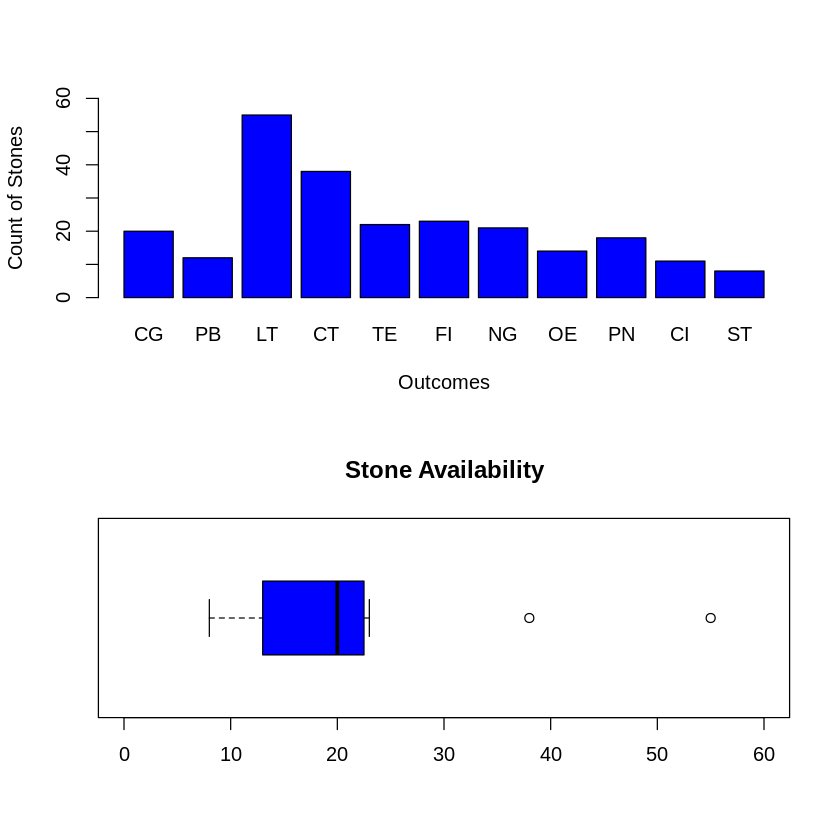

In [ ]:
### Code Block 2
par(mfrow=c(2,1))  # mfrow=c(1,1) OR mfrow=c(1,2) OR mfrow=c(2,1) OR mfrow=c(2,2)

barplot(available_stones_per_outcome, 
      col="blue", 
      xlab="Outcomes", 
      name=outcomes,
      ylab="Count of Stones", 
      ylim=c(0,60))
boxplot(  available_stones_per_outcome, 
          main="Stone Availability", 
          col="blue", ylim=c(0,60), 
          horizontal=T)

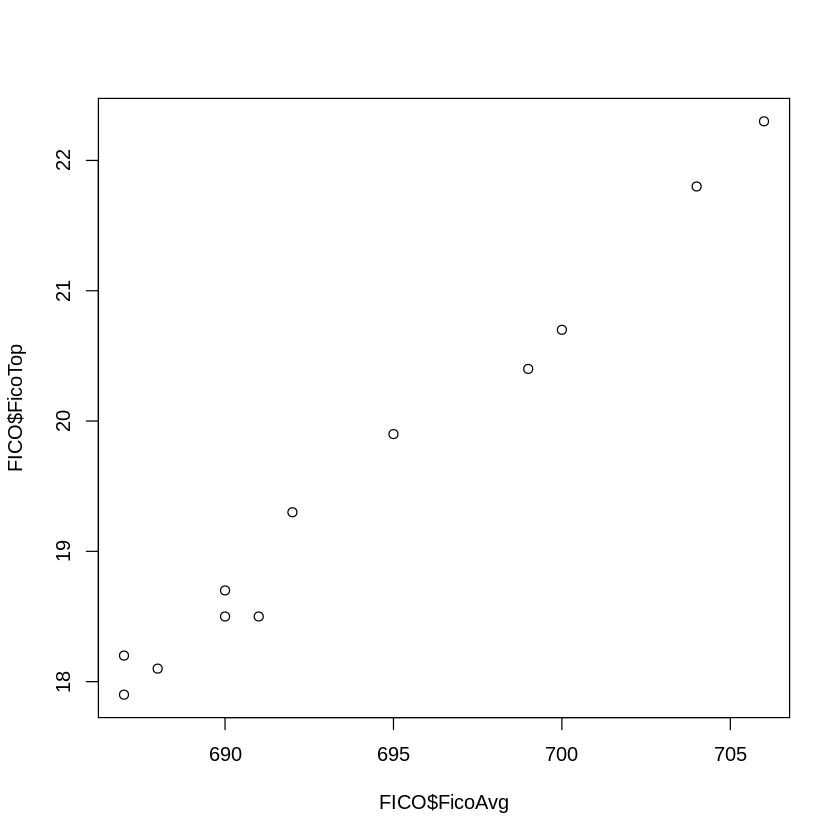

In [ ]:
### Code Block 3
plot(FICO$FicoAvg,FICO$FicoTop)

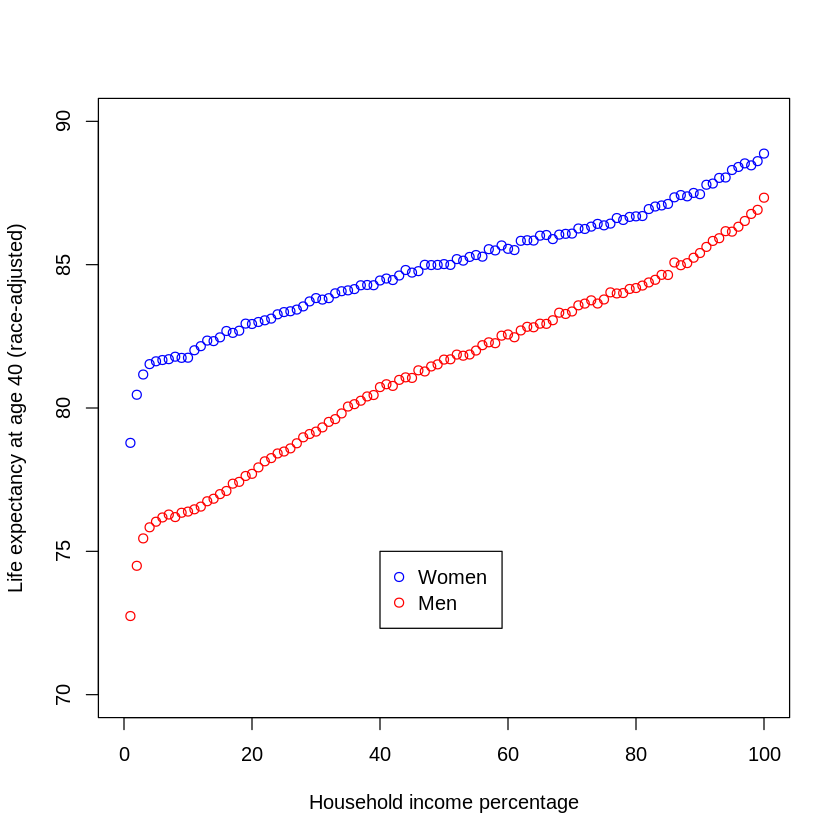

In [ ]:
### Code Block 4

plot( life$Household.Income.Percentile, 
      life$Race.Adjusted.Life.Expectancy.F, 
      col="blue", xlab="Household income percentage", 
      ylab="Life expectancy at age 40 (race-adjusted)", 
      xlim=c(0,100), 
      ylim=c(70,90)
      )
#
points( life$Household.Income.Percentile, 
        life$Race.Adjusted.Life.Expectancy.M, 
        col="red"
        )
#
legend( 40,75,
        legend=c("Women", "Men"), 
        col=c("blue","red"), 
        pch=1:1)
#


seq.2012..2020..1.,seq.2012..2020..1..1
<dbl>,<dbl>
2012,49219.27
2013,51162.10
2014,53104.92
2015,55047.75
2016,56990.58
2017,58933.41
2018,60876.24
2019,62819.07
2020,64761.90


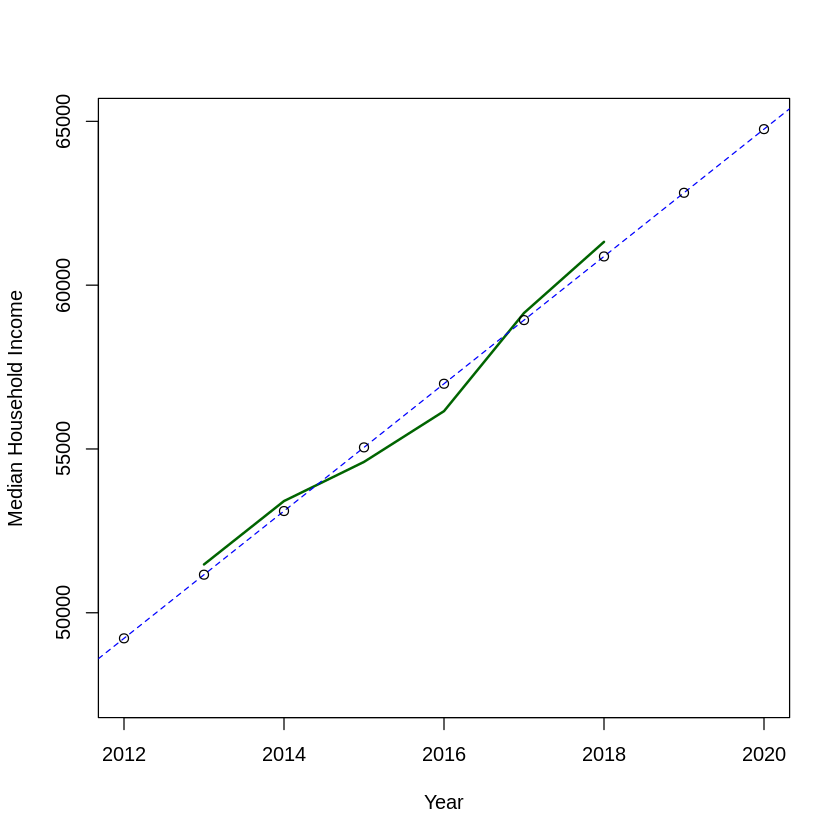

In [ ]:
### Code Block 5

simple.fit = lm(DBQ.med$Household.Income.by.Race ~ DBQ.med$ID.Year, 
                data.frame(
                    DBQ.med$ID.Year,
                    DBQ.med$Household.Income.by.Race
                    )
                )

newyears <- data.frame(seq(2012,2020,1)) 

DBQ.pred <- data.frame(
                newyears, 
                newyears*simple.fit$coefficients[2]+simple.fit$coefficients[1]
                ) 

plot(DBQ.med$ID.Year,  
        DBQ.med$Household.Income.by.Race, 
        type="l", 
        lwd=2, 
        col="dark green", 
        xlab="Year", 
        ylab="Median Household Income", 
        xlim=c(2012,2020), 
        ylim=c(47500,65000)
        ) 

abline(   simple.fit, 
          col="blue", 
          lty=2)

points(DBQ.pred) 

#DBQ.pred     # Uncomment this to see the predicted points. 

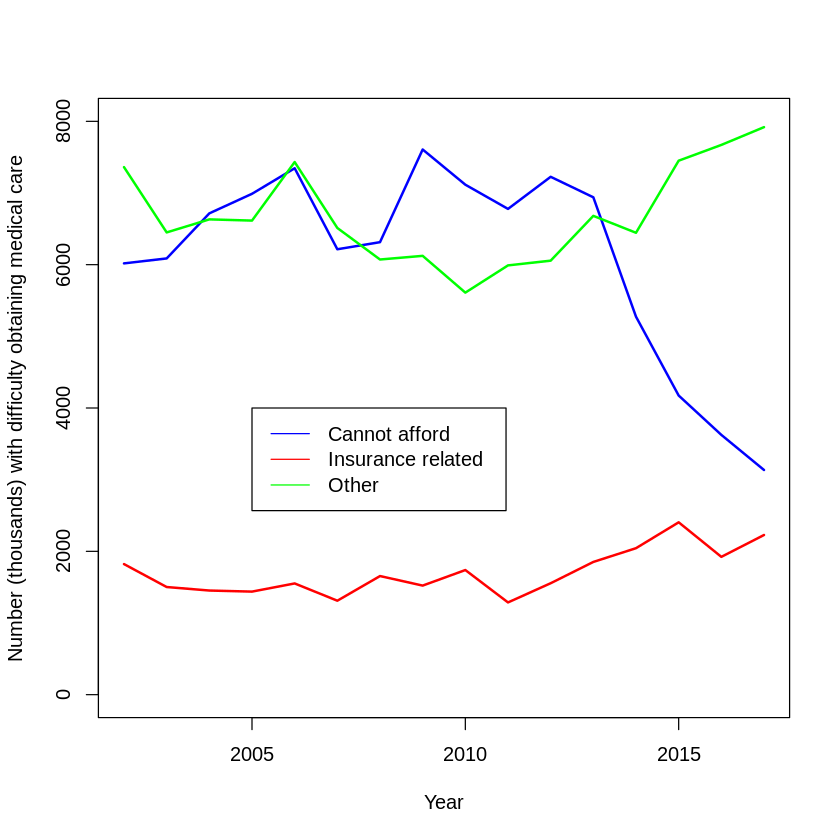

In [ ]:
### Code Block 6
simple.fit <- 
    lm(
        care$Cannot.afford~care$Year, 
        data.frame(
          care$Year, 
          care$Cannot.afford
          )
      )

newyears <- data.frame(
              seq(2002,2017,1)
              )

pred <- data.frame(
            newyears,
            newyears*simple.fit$coefficients[2]+simple.fit$coefficients[1]
            )

plot(   care$Year, 
        care$Cannot.afford, 
        type="l", 
        lwd="2", 
        col="blue", 
        xlab="Year", 
        ylab="Number (thousands) with difficulty obtaining medical care", 
        xlim=c(2002,2017), 
        ylim=c(0,8000)
        )

lines(care$Year, care$Insurance.related, type="l", lwd="2", col="red")

lines(care$Year, care$Other, type="l", lwd="2", col="green")

legend(2005,4000,
        legend = c("Cannot afford", "Insurance related", "Other"),
        col=c("blue","red","green"),
        lty=1:1:1)


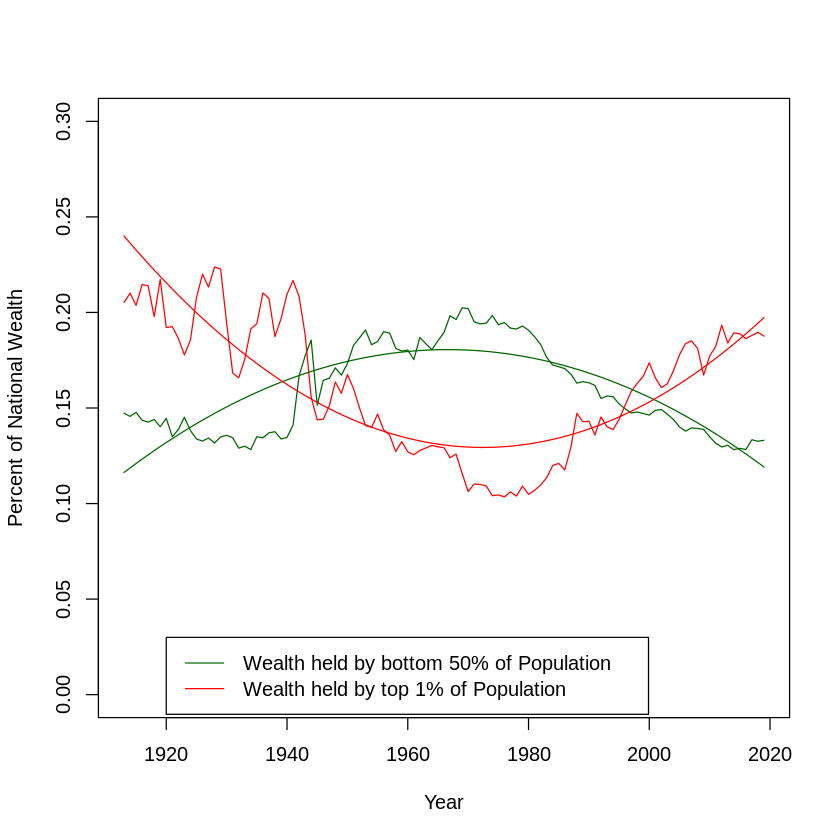

In [ ]:
### Code Block 7

WID.ratio$Year2 <- WID.ratio$Year^2  #makes quadratic term

WID.bottom = lm(WID.ratio$p0p50.Percent ~ WID.ratio$Year+WID.ratio$Year2)   #quadratic regression 

WID.top = lm(WID.ratio$p99p100.Percent ~ WID.ratio$Year+WID.ratio$Year2)    # quadratic regression 

WID.bottom.prediction = 
    data.frame( WID.ratio$Year, 
        WID.ratio$Year2*WID.bottom$coefficients[3]+
          WID.ratio$Year*WID.bottom$coefficients[2]+
          WID.bottom$coefficients[1]
        )

WID.top.prediction = 
    data.frame( WID.ratio$Year, 
        WID.ratio$Year2*WID.top$coefficients[3]+
          WID.ratio$Year*WID.top$coefficients[2]+
          WID.top$coefficients[1]
          )

plot( WID.ratio$Year,
      WID.ratio$p0p50.Percent, 
      col="dark green", 
      type="l",
      ylim=c(0,0.3),
      xlab="Year", 
      ylab="Percent of National Wealth")     #starting plot 

lines(WID.ratio$Year,WID.ratio$p99p100.Percent, col="red",type="l")  #plot of top 1% 

lines(WID.bottom.prediction, col="dark green")  #plot bottom 50 regression quadratic! 

lines(WID.top.prediction, col="red")    # plot top 1 regression quadratic

legend(1920,0.03,
        legend=c(
                  "Wealth held by bottom 50% of Population",
                  "Wealth held by top 1% of Population"
                  ),
        col=c("dark green","red"), 
        lty=1:1)   #puts in a legend


In [6]:
### Loading more data... 
# https://covid.cdc.gov/covid-data-tracker/#county-view?list_select_state=Iowa&data-type=Risk&list_select_county=19061 

covid = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/county_level_latest_data_for_iowa_2022-02-10.csv"))

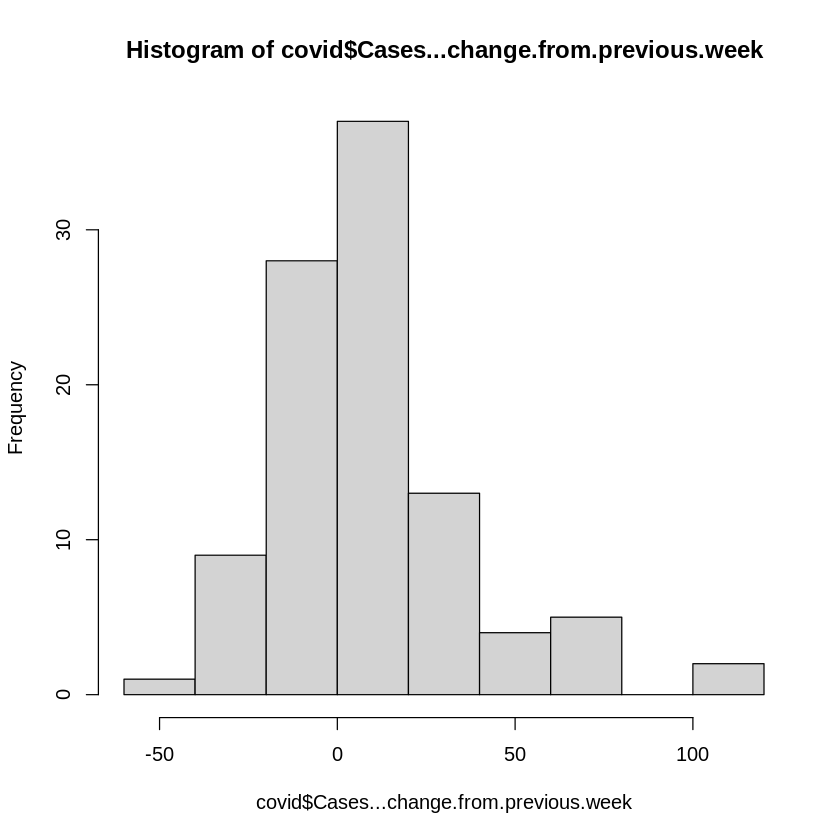

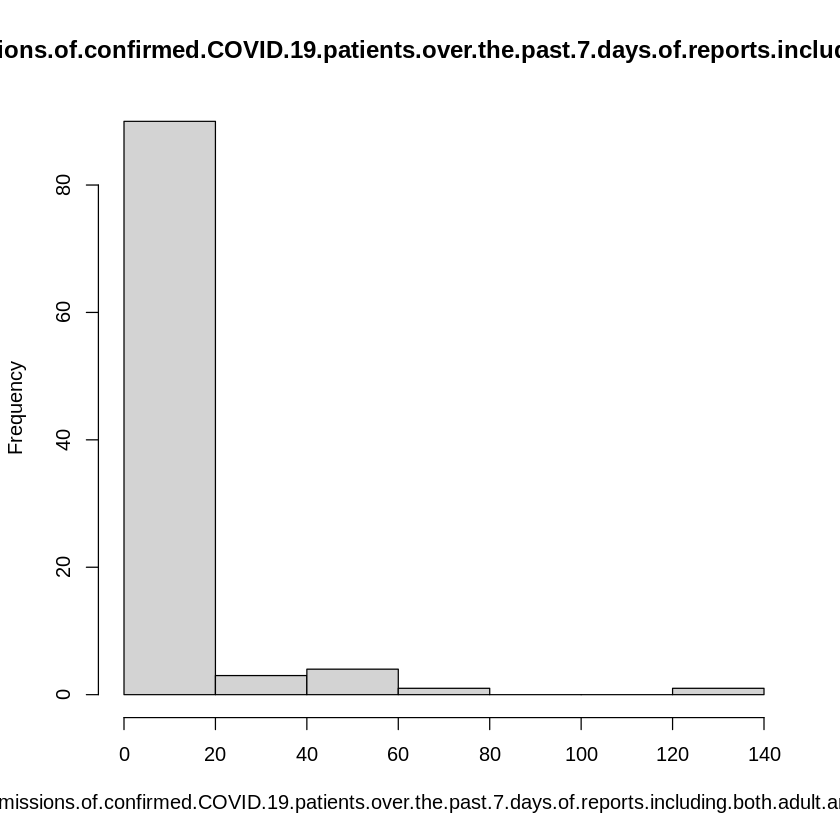

In [8]:
hist(covid$Cases...change.from.previous.week)
hist(covid$Total.admissions.of.confirmed.COVID.19.patients.over.the.past.7.days.of.reports.including.both.adult.and.pediatric.patients)